# Introduction to Text Analysis Using Python

In this tutorial we will be using Python to perform computational text analysis on a corpus of our choosing. While many of these functions are available in free web tools like WordCounter, SameDiff, and Voyant among others, using Python will allow for more advanced functions like natural language processing, character-space network modeling, vector space analysis, and topic modeling. This tutorial is structued into multiple exercises that gradually get more complex.

## Module Outline

1. Word Counts and Descriptive Statistics
2. To be continued...

## Data
For much of this tutorial we will be using data from "The American Presidency Project" of the University of California Santa Barbara, available at: https://www.presidency.ucsb.edu/.


***

## Contact Information
Garrett Morrow <br>
Digital Teaching Integration Research Fellow <br>
PhD Student, Political Science <br>
morrow.g [at] husky [dot] neu [dot] edu

## To-Do:
1. Add in more detailed documentation to Exercise 1 code.
2. Adapt Natural Language Processing from Prof. Nelson's tutorial.
3. Adapt Vector Space modeling from Prof. Nelson's tutorial.
4. Find topic modeling resources to create new exercise.
5. Find character space / network modeling resources to create new exercise.
6. Add an exercise in sentiment analysis.

***
# Exercise 1
## Word Counts and Descriptive Statistics
The first exercise is a basic tutorial that uses Python to read in .txt files, and finds descriptive statistics about the texts. We will find character and word counts, average word lengths, token counts (aka unique words), token ratios, number of gerunds (action words), and gerund ratio.

## Data
For this exercise, we are comparing six text documents from "The American Presidency Project". Four of them are recent platforms, and for fun, two are more historical (Richard Nixon's from 1968 and Abraham Lincoln's from 1960):
1. 2016 Democratic Party Political Platform (Hillary Clinton)
2. 2016 Republican Party Political Platform (Donald Trump)
3. 2012 Democratic Party Political Platform (Barack Obama)
4. 2012 Republican Party Political Platform (Mitt Romney)
5. 1968 Republican Party Political Platform (Richard Nixon)
6. 1860 Republican Party Political Platform (Abraham Lincoln)

## Libraries Used:
1. String
2. Matplotlib (specifically the pyplot library)
3. Pandas

## Key Terminology
<b> nGram:</b> <br>
<b> Corpus:</b> <br>
<b> Stopwords:</b> <br>
<b> Term Frequency:</b> <br>

### Step One: Reading in and Cleaning Data (aka Pre-Processing)
The first steps for Python text analysis is to read in data and clean it by making all the text lowercase and removing punctuation.

In [1]:
# These lines load in our required Python libraries.

import string
import matplotlib.pyplot as plt
import pandas

In [2]:
# This function is to read in our data files.

def read_file(name):
    with open(name, 'r', encoding = 'utf-8') as my_file:
        return my_file.read()

In [3]:
# Now we use the function we just created to read in the files and assign them to variables.

clinton = read_file('data/2016clintonH.txt')
trump = read_file('data/2016trump.txt')
obama = read_file('data/2012obama2.txt')
romney = read_file('data/2012romney.txt')
nixon = read_file('data/1968nixon.txt')
lincoln = read_file('data/1860lincoln.txt')

In [4]:
# This function will clean our data by spliting our strings on spaces, 
# making all the text lowercase, and removing punctuation.

def cleaner(file):
    newlist = []
    for word in file.split():
        word = word.lower()
        word = ''.join([ch for ch in word if ch not in string.punctuation])
        newlist.append(word)
    return newlist

# These lines clean our read text strings and assigns them to variables.

clinton_clean = cleaner(clinton)
trump_clean = cleaner(trump)
obama_clean = cleaner(obama)
romney_clean = cleaner(romney)
nixon_clean = cleaner(nixon)
lincoln_clean = cleaner(lincoln)

### Step Two: Calculating Descriptive Statistics
Now that we have clean lists of our texts, we can calculate descriptive statistics so we can then put them into dataframes using the 'pandas' library, and then visualize our statistics using 'pyplot' that is a part of 'matplotlib' library.

In [5]:
# This function will count individual characters (not including spaces and punctuation).

def characters(file):
    char_count = 0
    for word in file:
        for letter in word:
            char_count += 1
    return char_count

# We then run our function on our cleaned text to count characters.

clinton_chars = characters(clinton_clean)
trump_chars = characters(trump_clean)
obama_chars = characters(obama_clean)
romney_chars = characters(romney_clean)
nixon_chars = characters(nixon_clean)
lincoln_chars = characters(lincoln_clean)

In [6]:
# These lines very simply count total words similar to the above function counting characters,
# but by counting the length of the clean text lists..

clinton_words = len(clinton_clean)
trump_words = len(trump_clean)
obama_words = len(obama_clean)
romney_words = len(romney_clean)
nixon_words = len(nixon_clean)
lincoln_words = len(lincoln_clean)

In [7]:
# These lines calculate the average characters per word - a possible indicator of text complexity.

clinton_average = clinton_chars / clinton_words
trump_average = trump_chars / trump_words
obama_average = obama_chars / obama_words
romney_average = romney_chars / romney_words
nixon_average = nixon_chars / nixon_words
lincoln_average = lincoln_chars / lincoln_words

In [8]:
# This function calculates tokens, or unique words - another possible indicator of complexity.

def tokens(file):
    newlist = []
    for word in file:
        if word not in newlist:
            newlist.append(word)
    return newlist

clinton_token_count = len(tokens(clinton_clean))
trump_token_count = len(tokens(trump_clean))
obama_token_count = len(tokens(obama_clean))
romney_token_count = len(tokens(romney_clean))
nixon_token_count = len(tokens(nixon_clean))
lincoln_token_count = len(tokens(lincoln_clean))

# The texts in our corpus are different lengths, so this function calculates the token ratio to somewhat normalize them.

clinton_token_ratio = clinton_token_count / clinton_words
trump_token_ratio = trump_token_count / trump_words
obama_token_ratio = obama_token_count / obama_words
romney_token_ratio = romney_token_count / romney_words
nixon_token_ratio = nixon_token_count / nixon_words
lincoln_token_ratio = lincoln_token_count / lincoln_words

In [9]:
# This function calculates gerunds (words ending in -ing), a rough estimate of actionable content.

def gerunds(file):
    gerund_count = 0
    for word in file:
            if word[-3:] == 'ing':
                gerund_count += 1
    return gerund_count

clinton_gerunds = gerunds(clinton_clean)
trump_gerunds = gerunds(trump_clean)
obama_gerunds = gerunds(obama_clean)
romney_gerunds = gerunds(romney_clean)
nixon_gerunds = gerunds(nixon_clean)
lincoln_gerunds = gerunds(lincoln_clean)

# We also calculate the gerund ratio of each text similar to token ratios.

clinton_gerund_ratio = clinton_gerunds / clinton_words
trump_gerund_ratio = trump_gerunds / trump_words
obama_gerund_ratio = obama_gerunds / obama_words
romney_gerund_ratio = romney_gerunds / romney_words
nixon_gerund_ratio = nixon_gerunds / nixon_words
lincoln_gerund_ratio = lincoln_gerunds / lincoln_words

### Step Three: Pandas!
In this step we will assemble our data into a 'pandas' dataframe for easy visualization.

In [10]:
# We will create a pandas dataframe by hand with our variables, to do this we first assign our multiple variables
# to a dictionary where the values are lists.

data = {'Candidate': ['Hillary Clinton', 'Donald Trump', 'Barack Obama', 'Mitt Romney', 'Richard Nixon', 'Abraham Lincoln'], 
        'Total_Characters': [clinton_chars, trump_chars, obama_chars, romney_chars, nixon_chars, lincoln_chars],
        'Total_Words': [clinton_words, trump_words, obama_words, romney_words, nixon_words, lincoln_words],
        'Average_Characters/Word': [clinton_average, trump_average, obama_average, romney_average, nixon_average, lincoln_average],
        'Total_Tokens': [clinton_token_count, trump_token_count, obama_token_count, romney_token_count, nixon_token_count, lincoln_token_count],
        'Token_Ratio': [clinton_token_ratio, trump_token_ratio, obama_token_ratio, romney_token_ratio, nixon_token_ratio, lincoln_token_ratio],
        'Total_Gerunds': [clinton_gerunds, trump_gerunds, obama_gerunds, romney_gerunds, nixon_gerunds, lincoln_gerunds],
        'Gerund_Ratio': [clinton_gerund_ratio, trump_gerund_ratio, obama_gerund_ratio, romney_gerund_ratio, nixon_gerund_ratio, lincoln_gerund_ratio]
       }

# Then we form our dataframe and name our columns.

df = pandas.DataFrame(data, columns = ['Candidate', 
                                       'Total_Characters', 
                                       'Total_Words', 
                                       'Average_Characters/Word',
                                       'Total_Tokens',
                                       'Token_Ratio', 
                                       'Total_Gerunds', 
                                       'Gerund_Ratio'])

df

,Candidate,Total_Characters,Total_Words,Average_Characters/Word,Total_Tokens,Token_Ratio,Total_Gerunds,Gerund_Ratio
0,Hillary Clinton,140443,25966,5.408727,4026,0.155049,1034,0.039821
1,Donald Trump,191177,35621,5.366975,5476,0.153730,1002,0.028129
2,Barack Obama,139725,26558,5.261127,3795,0.142895,1103,0.041532
3,Mitt Romney,165358,30541,5.414296,5005,0.163878,924,0.030254
4,Richard Nixon,55487,9956,5.573222,2513,0.252411,271,0.027220
5,Abraham Lincoln,6190,1194,5.184255,517,0.432998,19,0.015913


### Step Four: Visualization
We now will use 'pyplot', a part of 'matplotlib', to visualize some of our data.

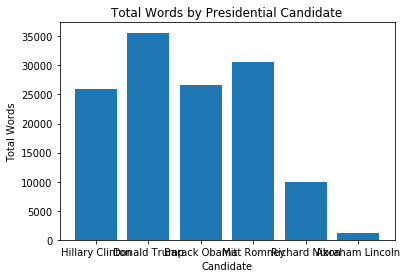

In [11]:
# Below are the lines to create our column graph visualization.

plt.bar(df['Candidate'], height=df['Total_Words'])
plt.xlabel('Candidate')
plt.ylabel('Total Words')
plt.title('Total Words by Presidential Candidate')
plt.rcParams["figure.figsize"] = [10,10]
plt.show()

### Step Five: Top Ten Most Frequent Words (aka Term Frequency)
Next we will list the top words used by one of our candidates to analyze the party platform closer. The frequency of words can tell us what topics are being discussed, and the primary issues the candidate chooses to focus for their campaign.

In [12]:
# This function creates a dictionary that counts tokens and assigns a numer as the value.
# We will use Richard Nixon's 1968 platform as our corpus.

def wordfreq(file):
    counter = dict()
    for word in file:
        if word not in counter:
            counter[word] = 1
        else:
            counter[word] += 1
    return counter

nixon_word_freq = wordfreq(nixon_clean)



# In its current form, the variable will return an unordered list.
# This next function sorts the dictionary by converting it into a list of tuple and sorting it
# into the top 10 words and the count.

def sorter(file):
    newlist = []
    for key, value in list(file.items()):
        newlist.append((value,key))
    newlist.sort(reverse=True)
    return newlist
nixon_freq_sorted = sorter(nixon_word_freq)
nixon_freq_sorted[:10]

[(567, 'the'),
 (475, 'and'),
 (454, 'of'),
 (349, 'to'),
 (200, 'we'),
 (187, 'in'),
 (139, 'will'),
 (138, 'a'),
 (115, 'for'),
 (111, 'our')]

As we can see, the list right now is not very useful. It is filled with what we call stopword, the parts of speech like 'the,' 'and,' and 'or,' that do not add very much to the meaning of our speech. We will reconsider this problem in the second exercise where we will use natural language tools and remove stopwords.

### Conclusion: Using counting tools to answer a simple research question.

In this section, we will use the simple counting code that we have used to answer a simple research question and hypothesis.

Question: Do Republicans and Democrats appeal to different audiences using their party platform language?

Hypothesis: Contemporary republicans (in this case Donald Trump, Mitt Romney, and Richard Nixon) will use variations of the word 'America' to emphasis patriotism.

In [13]:
# This code is similar to the counting code above for gerunds and tokens, but counts our target words.

def amercount(file):
    count = 0
    for word in file:
        if word[0:8] == 'america':
            count += 1
    return count

clinton_amer = amercount(clinton_clean)
clinton_amer_ratio = clinton_amer/clinton_words

trump_amer = amercount(trump_clean)
trump_amer_ratio = trump_amer/trump_words

obama_amer = amercount(obama_clean)
obama_amer_ratio = obama_amer/obama_words

romney_amer = amercount(romney_clean)
romney_amer_ratio = romney_amer/romney_words

nixon_amer = amercount(nixon_clean)
nixon_amer_ratio = nixon_amer/nixon_words

lincoln_amer = amercount(lincoln_clean)
lincoln_amer_ratio = lincoln_amer/lincoln_words

# Similar to above, we assemble the data into a pandas dataframe.

data = {'Candidate': ['Hillary Clinton', 'Donald Trump', 'Barack Obama', 'Mitt Romney', 'Richard Nixon', 'Abraham Lincoln'], 
        'America_Total': [clinton_amer, trump_amer, obama_amer, romney_amer, nixon_amer, lincoln_amer],
        'America_Ratio': [clinton_amer_ratio, trump_amer_ratio, obama_amer_ratio, romney_amer_ratio, nixon_amer_ratio, lincoln_amer_ratio]}

df2 = pandas.DataFrame(data, columns = ['Candidate', 
                                       'America_Total', 
                                       'America_Ratio'])

df2

,Candidate,America_Total,America_Ratio
0,Hillary Clinton,51,0.001964
1,Donald Trump,42,0.001179
2,Barack Obama,60,0.002259
3,Mitt Romney,44,0.001441
4,Richard Nixon,12,0.001205
5,Abraham Lincoln,0,0.000000


Basic results show us that our simple hypothesis was wrong. In fact, although the <i>n</i> is small, it appears that the two Democratic candidates (Barack Obama and Hilary Clinton) used variations of the word 'America' more frequently then the Republican candidiates, based upon word frequency ratio.

***
# Exercise 2
## Natural Language Processing
Computational text analysis is good for analyzing large corpora, thousands, if not millions, of words long. The basic counting tools we used in exercise one forms the core of our digital research methodologies, but we want to do more. In this exercise, we will be applying natural language processing (NLP) tools to texts to achieve a broad, zoomed-out view of our data. NLP refers to many methods that computers use language text. Humans speak in <i>natural language</i>, but computers "speak" in a numerical <i>formal language</i> - NLP tools help us bridge the gap when using computational text analysis.

This exercise has been adaption from a NLP practicum designed by Professor Laura Nelson of the Sociology Department at Northeastern University.


## Data
For this exercise, we are comparing the same political party platform documents from "The American Presidency Project". Our corpus consists of every Republican and Democrat party platform since the 2000 election. However, instead of analyzing each document individually, we have combined them into two documents: one consisting of all the Democrats and the other is all of the Republicans.

1. Democrats (Gore, Kerry, Obama(2008), Obama(2012), Clinton)
2. Republicans (Bush(2000), Bush(2004), McCain, Romney, Trump)



## Libraries Used:
1. String
2. Nltk



## <u>New</u> Key Terminology
<b> Token:</b> <br>
<b> Pre-Processing:</b> <br>
<b> POS Tagging:</b> <br>
<b> NLTK (Natural Lanugage Tool Kit):</b> <br>
<b> Concordance:</b> <br>
<b> Document Term Matrix (DTM):</b> <br>
<b> TF-DIF Scores:</b> <br>

In [14]:
# The first basic step is to reset all of our variables from exercise one so we have a clean slate -
# though we will need to repeat some functions.

%reset -f

In [120]:
# These lines load in our required Python libraries.

import nltk
import string
import pandas
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Step One: Reading and Tokenizing
In the first step, we will read in our collection of political platforms similar to exercise one, then we will tokenize it using the 'nltk' package instead of the method used previously.

In [47]:
# NLTK has a number of built in models, but to save time, we only want a few of them so we will designate a variable to
# download only specific models we will use in this exercise. 
# For a list of models and built-in NLTK corpora, see: http://www.nltk.org/nltk_data/

# This variable is our model data variable, each string is a different model that can be found in the link above.
nltkdata = ["punkt", "words", "stopwords", "averaged_perceptron_tagger", "maxent_ne_chunker", 'wordnet']

# This line will download the specific models we want to use - alternatively, we could download the entire nltk package.
nltk.download(nltkdata)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is

True

In [17]:
# Below is the same readfile function seen in exercise one.

def read_file(name):
    with open(name, 'r', encoding = 'utf-8') as my_file:
        return my_file.read()

In [18]:
# Next we will import the stopwords library that we downloaded for nltk above.

from nltk.corpus import stopwords

In [19]:
# These variables use our read function above to read in our texts.

dems = read_file('data/Democrats.txt')
reps = read_file('data/Republicans.txt')

In [20]:
# Next we will use nltk to tokenize our text.

dems_tokens = nltk.word_tokenize(dems)
reps_tokens = nltk.word_tokenize(reps)

In [21]:
# Next we will need to pre-process the text similar to what we did in exercise one.
# This includes: making all the text lowercase, removing punctuation, removing stopwords.
# As we saw in exercise one, step five, the most frequently used words are stopwords, so it is useful to remove them.

dems_clean = [word.lower() for word in dems_tokens if 
                 (word.lower() not in stopwords.words('english')) &
                (word not in string.punctuation)]

reps_clean = [word.lower() for word in reps_tokens if 
                 (word.lower() not in stopwords.words('english')) &
                (word not in string.punctuation)]

In [22]:
# Let's check out our tokens

dems_clean[:15]

['preamble',
 '2016',
 'democrats',
 'meet',
 'philadelphia',
 'basic',
 'belief',
 'animated',
 'continental',
 'congress',
 'gathered',
 '240',
 'years',
 'ago',
 'many']

In [23]:
# We can now use nltk to count the most frequent tokens, similar to exercise one, step five.
# The function is .FreqDist()

dems_freq = nltk.FreqDist(dems_clean)
dems_freq.most_common(20)

[("'s", 749),
 ('america', 484),
 ('must', 469),
 ('support', 442),
 ('american', 441),
 ('democrats', 426),
 ('health', 404),
 ('americans', 398),
 ('new', 390),
 ('people', 380),
 ('work', 372),
 ('believe', 325),
 ('president', 307),
 ('security', 298),
 ('also', 292),
 ('make', 288),
 ('care', 273),
 ('world', 272),
 ('need', 251),
 ('jobs', 243)]

As we can see, tokenization is not perfect because the most commonly used token is 's - used in contractions!

## Step Two: Part-of-Speech (POS) Tagging
Stopwords and tokens present challenges to computational text analysis. One alternative is to use the built-in POS tagging system in nltk to assign the part-of-speech to each token (e.g., noun, adjective, adverb, etc.). We can then see how different parts of speech are used in the party platforms. The POS tagger comes from the University of Pennsylvania treebank corpus, and a complete list can be found here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [24]:
# This function is the built-in POS tagger.

dems_tagged = nltk.pos_tag(dems_clean)
reps_tagged = nltk.pos_tag(reps_clean)

# Let's see what this looks like.

dems_tagged[:10]

[('preamble', 'JJ'),
 ('2016', 'CD'),
 ('democrats', 'NNPS'),
 ('meet', 'VBP'),
 ('philadelphia', 'JJ'),
 ('basic', 'JJ'),
 ('belief', 'NN'),
 ('animated', 'VBD'),
 ('continental', 'JJ'),
 ('congress', 'NN')]

In [28]:
# Now let's combine POS and .FreqDist() to see the most used POS.

dems_tag_freq = nltk.FreqDist([tag for word, tag in dems_tagged])
reps_tag_freq = nltk.FreqDist([tag for word, tag in reps_tagged])

# Again, let's see what this looks like.

dems_tag_freq.most_common(10)

[('NN', 22074),
 ('JJ', 14089),
 ('NNS', 12038),
 ('VBP', 5119),
 ('VBG', 3526),
 ('RB', 2657),
 ('VB', 2050),
 ('VBD', 1869),
 ('VBZ', 1096),
 ('VBN', 995)]

NN's are Nouns, JJ's are adjectives, NNS' are plural nouns, and we can see the rest at the UPenn link above.

We can now combine our POS and counting methods to see the most used nouns, adjectives, etc.

In [30]:
# We will count the top nouns

dems_noun = [word for word,pos in dems_tagged if pos == 'NN' or pos=='NNS' or pos=='NNP' or pos=='NNPS']
reps_noun = [word for word,pos in reps_tagged if pos == 'NN' or pos=='NNS' or pos=='NNP' or pos=='NNPS']

In [37]:
# Then we will see what the most commonly nouns are for the democratic platform.

dems_noun_freq = nltk.FreqDist(dems_noun).most_common
dems_noun_freq(15)

[('health', 404),
 ('democrats', 391),
 ('people', 380),
 ('americans', 312),
 ('president', 307),
 ('support', 304),
 ('security', 298),
 ('world', 272),
 ('care', 259),
 ('america', 257),
 ('jobs', 243),
 ('families', 243),
 ('work', 241),
 ('government', 238),
 ('rights', 234)]

In [38]:
# Let's do the same for the republicans.

reps_noun_freq = nltk.FreqDist(reps_noun).most_common
reps_noun_freq(15)

[('president', 595),
 ('government', 570),
 ('states', 478),
 ('people', 459),
 ('health', 425),
 ('support', 381),
 ('care', 341),
 ('world', 322),
 ('administration', 312),
 ('america', 311),
 ('security', 292),
 ('nation', 291),
 ('tax', 291),
 ('law', 266),
 ('americans', 253)]

In [39]:
# We can also do the same for verbs and adjectives.

# Verb function:

dems_verb = [word for word,pos in dems_tagged if pos == 'VB' or pos=='VBD' or pos=='VBG' or pos=='VBN' or pos=='VBP' or pos=='VBZ']
reps_verb = [word for word,pos in reps_tagged if pos == 'VB' or pos=='VBD' or pos=='VBG' or pos=='VBN' or pos=='VBP' or pos=='VBZ']

# Adjective function:

dems_adj = [word for word,pos in dems_tagged if pos == 'JJ' or pos=='JJR' or pos=='JJS']
reps_adj = [word for word,pos in reps_tagged if pos == 'JJ' or pos=='JJR' or pos=='JJS']

In [42]:
# Let's also see what they look like.

dems_verb_freq = nltk.FreqDist(dems_verb).most_common
dems_adj_freq = nltk.FreqDist(dems_adj).most_common
print(dems_verb_freq(15))
print(dems_adj_freq(15))

[('believe', 315), ('make', 273), ('continue', 197), ('ensure', 197), ('including', 184), ('need', 178), ('committed', 144), ('work', 129), ('support', 125), ('working', 122), ('create', 107), ('provide', 107), ('protect', 94), ('help', 94), ('take', 94)]
[('american', 441), ('new', 390), ('democratic', 207), ('public', 204), ('national', 202), ('economic', 201), ('global', 169), ('federal', 144), ('united', 141), ('nuclear', 137), ('military', 133), ('international', 128), ('many', 124), ('strong', 120), ('good', 104)]


In [43]:
# And the same for the republicans.

reps_verb_freq = nltk.FreqDist(reps_verb).most_common
reps_adj_freq = nltk.FreqDist(reps_adj).most_common
print(reps_verb_freq(15))
print(reps_adj_freq(15))

[('ensure', 194), ('make', 190), ('including', 174), ('republicans', 136), ('believe', 129), ('support', 123), ('made', 115), ('continue', 103), ('need', 102), ('provide', 98), ('protect', 97), ('america', 94), ('oppose', 90), ('—', 87), ('recognize', 84)]
[('american', 561), ('federal', 485), ('republican', 410), ('new', 392), ('national', 330), ('united', 278), ('economic', 270), ('current', 233), ('public', 225), ('u.s.', 212), ('free', 207), ('military', 202), ('private', 194), ('international', 170), ('political', 160)]


We can now see how language is used differently betweeen the two party platforms. While many of the words are similar (American, Presidents, believe, etc.), there are also interesting differences. For example the Democratic usage of the words 'jobs,' 'families,' and 'work' reinforce the historical socially-focused democratic party as we know it, while the Republican usage of the words 'security,' 'tax,' and 'order' reinforce the law & order and national security foci of Republican party history.

## Step Three: nGrams
In this next step of analysis we will look at the most commonly used nGrams (bigrams and trigrams) of the political platforms. These functions are built into nltk. We will use the variables we have created with the stopwords removed, but it may also be informative to just use the tokenized text.

In [54]:
from nltk.util import ngrams

In [64]:
# First we will extract bigrams from both the democratic and republican platforms and see what the most common are.

dems_bigrams = ngrams(dems_clean, 2)
dems_bigrams_freq = nltk.FreqDist(dems_bigrams).most_common

reps_bigrams = ngrams(reps_clean, 2)
reps_bigrams_freq = nltk.FreqDist(reps_bigrams).most_common

# We can also do trigrams.

dems_trigrams = ngrams(dems_clean, 3)
dems_trigrams_freq = nltk.FreqDist(dems_trigrams).most_common

reps_trigrams = ngrams(reps_clean, 3)
reps_trigrams_freq = nltk.FreqDist(reps_trigrams).most_common

In [69]:
print(dems_bigrams_freq(10))
print(dems_trigrams_freq(10))
print(reps_bigrams_freq(10))
print(reps_trigrams_freq(10))

[(('health', 'care'), 158), (('president', 'obama'), 142), (('democratic', 'party'), 138), (('united', 'states'), 134), (('america', "'s"), 117), (('democrats', 'believe'), 103), (('middle', 'class'), 84), (('al', 'gore'), 84), (('nation', "'s"), 73), (('climate', 'change'), 60)]
[(('president', 'obama', 'democratic'), 23), (('obama', 'democratic', 'party'), 23), (('president', 'obama', "'s"), 22), (('john', 'kerry', 'john'), 21), (('kerry', 'john', 'edwards'), 21), (('democratic', 'party', 'believe'), 19), (('president', 'obama', 'democrats'), 18), (('president', 'democratic', 'party'), 17), (('al', 'gore', 'democratic'), 16), (('gore', 'democratic', 'party'), 16)]
[(('united', 'states'), 253), (('america', "'s"), 236), (('president', 'bush'), 218), (('health', 'care'), 195), (('nation', "'s"), 131), (('current', 'administration'), 117), (('federal', 'government'), 114), (('american', 'people'), 104), (('republican', 'congress'), 93), (('president', "'s"), 87)]
[(('president', 'bush',

Again, we can see some trends from the bigrams and trigram frequencies. Many of the ngrams we see are the names of the candidates, which is not entirely surprising, but it is informative seeing 'climate change' appearing frequently in the Democratic platforms while seeing "weapons mass destruction" (remember we have removed stopwords) appearing frequently in the Republican platforms.

## Step Four: Concordances and Similarity
In this phase of analysis, we will use concordance analysis to see the words that surround specific words. This will show us the words that appear before and after it. We will not use the tokenized version of the text, not the version with stopwords removed - this will allow us to see the full context surrounding a word.

In [71]:
# First we need to turn our tokenized lists into nltk 'text-objects'.

dems_nltk = nltk.Text(dems_tokens)
reps_nltk = nltk.Text(reps_tokens)

In [91]:
# Now we can see the concordances. First we will do the Democrats.

dems_nltk.concordance("immigration")

Displaying 25 of 46 matches:
temic racism to our deeply broken immigration system to discrimination against 
ustice system . Fixing our Broken Immigration System The United States was foun
And that is why Democrats believe immigration is not just a problem to be solve
e Democratic Party supports legal immigration , within reasonable limits , that
t , we recognize that the current immigration system is broken . More than 11 m
ithout proper documentation . The immigration bureaucracy is full of backlogs t
e need to urgently fix our broken immigration system—which tears families apart
 would exclude or eliminate legal immigration avenues and denigrate immigrants 
ntinue to fight for comprehensive immigration reform , we will defend and imple
 take that last step . We believe immigration enforcement must be humane and co
sel for unaccompanied children in immigration courts . We should consider all a
 that all Americans—regardless of immigration status—have access to quality hea
nd finally 

In [92]:
# And we can do the same for the Republicans.

reps_nltk.concordance("immigration")

Displaying 25 of 36 matches:
ter identification ( ID ) laws to immigration , from healthcare programs to lan
ders picking winners and losers . Immigration and the Rule of Law Our party is 
nomy is the American worker . Our immigration system must protect American work
ur nation as a whole . America 's immigration policy must serve the national in
 and disgust , the mocking of our immigration laws by a president who made hims
s of murdered innocents . Illegal immigration endangers everyone , exploits the
ports of entry and to enforce our immigration laws . That is why we support bui
y to take steps to reduce illegal immigration . We condemn the Obama Administra
 in nuclear proliferation . While immigration is addressed in more detail elsew
ty issue , and that our nation 's immigration and refugee policies are placing 
 secure our borders , enforce our immigration laws , and properly screen refuge
al trade—by a policy of strategic immigration , granting more work visas to hol
onal princi

In [93]:
# We can also see the contextual similarity surrounding the word and see what words appear in a similar context.
# We start with the Democratic platforms.

dems_nltk.similar("immigration")

education justice medicare intelligence that and it businesses now
growth health americans security while families as so believe bridges
investment


In [94]:
# And the same for the Republican platforms.

reps_nltk.similar("immigration")

political education tax federal legal health states country strength
economy national schools jobs free justice learn work prosperity
current taxation


## Step Five: Difference of Proportions
Due to the nature of language, the Democratic and Republican platforms use very similar words. So the next steps should be to see how different the texts are. This is a more elaborate process of transforming text counts into proportions then subtracting one from the other.

We will be using the CountVectorizer function that is part of the `scikit-learn` machine-learning library we imported at the beginning of the exercise. For more information, see here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html.

In [99]:
# We will first need to convert our text into a document term matrix (DTM - see the terminology above). 
# DTM is a method of vector representation - it will transform the text into numbers.

# First we define our corpus.

corpus = [dems, reps]

# Next we define our vectorizer.
vect = CountVectorizer(stop_words='english')

# Then we trasnform our text to a DTM.
textdtm = vect.fit_transform(corpus)
textdtm

<2x11513 sparse matrix of type '<class 'numpy.int64'>'
	with 16883 stored elements in Compressed Sparse Row format>

In [104]:
# We can also see what this looks like

print(textdtm)

  (0, 559)	1
  (0, 4972)	1
  (0, 7676)	1
  (0, 6964)	2
  (0, 686)	2
  (0, 6272)	2
  (0, 6959)	1
  (0, 6441)	1
  (0, 8734)	1
  (0, 262)	1
  (0, 6661)	1
  (0, 5115)	1
  (0, 8807)	1
  (0, 2432)	1
  (0, 6921)	1
  (0, 7307)	1
  (0, 6161)	1
  (0, 6790)	1
  (0, 1383)	1
  (0, 7006)	1
  (0, 6489)	1
  (0, 10380)	1
  (0, 10666)	1
  (0, 11161)	1
  (0, 1017)	1
  :	:
  (1, 8398)	7
  (1, 4742)	77
  (1, 11270)	96
  (1, 6253)	126
  (1, 1981)	32
  (1, 7495)	459
  (1, 647)	563
  (1, 2937)	27
  (1, 11417)	240
  (1, 4884)	48
  (1, 10386)	12
  (1, 6033)	164
  (1, 7030)	11
  (1, 7881)	595
  (1, 536)	51
  (1, 11483)	178
  (1, 4586)	1
  (1, 2174)	330
  (1, 2283)	3
  (1, 1172)	15
  (1, 1120)	31
  (1, 6531)	58
  (1, 2814)	48
  (1, 106)	2
  (1, 7803)	5


In [112]:
# These numbers look incomprehensible, but they indicate words in our texts.
# We can use the .get_feature_names() function to see what they represent.

print(vect.get_feature_names()[-25:])

['yezidis', 'yield', 'yielded', 'yielding', 'yields', 'york', 'yosemite', 'young', 'younger', 'youngest', 'youngsters', 'youth', 'youths', 'yucca', 'yugoslav', 'zealand', 'zenith', 'zero', 'zika', 'zimbabwe', 'zimbabwean', 'zip', 'zone', 'zones', 'zoning']


In [117]:
# Since the data form is compressed, it saves a lot of memory.
# But we can also see what the data would look like in a pandas dataframe.

dtm_df = pandas.DataFrame(vect.fit_transform(corpus).toarray(), columns=vect.get_feature_names(), index = ['dems', 'reps'])

#view the dtm dataframe
dtm_df

,00,000,10,100,1000,104,10th,11,111,115,...,zealand,zenith,zero,zika,zimbabwe,zimbabwean,zip,zone,zones,zoning
dems,1,54,13,13,1,0,0,18,0,0,...,3,0,4,2,3,0,3,4,5,0
reps,0,54,15,28,0,1,1,32,1,1,...,3,1,9,1,5,1,3,4,5,5


As we can see, the function as applied numbers to our words based upon usage. and there are a lot of words (11,513 columns).

Next, we will transform each cell of our matrix into a proportion rather than a raw usage count.

In [119]:
# First we need to create a raw word count, summing the counts we have.

dtm_df['sum'] = dtm_df.sum(axis=1)

dems    65472
reps    91023
Name: sum, dtype: int64

In [123]:
# Let's see what our words counts are.

dtm_df['sum']

dems    65472
reps    91023
Name: sum, dtype: int64

In [122]:
# The proportion is a simple calculation of dividing the colmuns by the sum.

dtm_df_prop = dtm_df.loc[:,"00":"zoning"].div(dtm_df["sum"], axis=0)

In [124]:
# We can now see what the word proportions are.

dtm_df_prop

,00,000,10,100,1000,104,10th,11,111,115,...,zealand,zenith,zero,zika,zimbabwe,zimbabwean,zip,zone,zones,zoning
dems,0.000015,0.000825,0.000199,0.000199,0.000015,0.000000,0.000000,0.000275,0.000000,0.000000,...,0.000046,0.000000,0.000061,0.000031,0.000046,0.000000,0.000046,0.000061,0.000076,0.000000
reps,0.000000,0.000593,0.000165,0.000308,0.000000,0.000011,0.000011,0.000352,0.000011,0.000011,...,0.000033,0.000011,0.000099,0.000011,0.000055,0.000011,0.000033,0.000044,0.000055,0.000055


In [130]:
# We want to turn these proportions into the most distinct for our two documents.
# To do so, will subtract one row from the other to find the most unique words.

# The words most distinct to the Democratic platforms.

(dtm_df_prop.loc['dems']-dtm_df_prop.loc['reps']).sort_values(ascending=False)[:30]

democrats      0.005979
believe        0.003514
work           0.003167
americans      0.002815
obama          0.002460
jobs           0.002211
make           0.002166
workers        0.002150
continue       0.002072
democratic     0.002061
need           0.002025
committed      0.002021
communities    0.001779
new            0.001650
help           0.001562
al             0.001526
health         0.001514
gore           0.001479
class          0.001476
america        0.001464
create         0.001408
global         0.001406
families       0.001358
security       0.001330
fight          0.001267
build          0.001264
clean          0.001163
invest         0.001160
good           0.001118
pay            0.001103
dtype: float64

In [131]:
# The words most distinct to the Republican platforms.

(dtm_df_prop.loc['dems']-dtm_df_prop.loc['reps']).sort_values(ascending=True)[:30]

republican       -0.003855
federal          -0.003156
republicans      -0.003111
congress         -0.002923
government       -0.002533
bush             -0.002364
states           -0.002234
current          -0.001903
president        -0.001848
state            -0.001473
freedom          -0.001446
free             -0.001285
private          -0.001256
law              -0.001250
applaud          -0.001183
religious        -0.001147
united           -0.001015
especially       -0.000929
amendment        -0.000923
legislation      -0.000903
control          -0.000894
individuals      -0.000866
oppose           -0.000824
foreign          -0.000813
congressional    -0.000781
urge             -0.000773
affirm           -0.000763
political        -0.000761
encourage        -0.000752
administration   -0.000751
dtype: float64

In [143]:
# We can also see the numbers associated with a specific word.
# Subract one from the other to see the proportions we saw above.

dtm_df_prop['federal']

dems    1.0
reps    1.0
Name: sum, dtype: float64

Another way to discover the most distinctive words is to assign word scores which is weighted not just by the proportion of the word in its own text, but across all texts in a corpus. Therefore, a word frequent in both document is not as distinct.

We do this by calculating tf-idf scores (see terminology above) calculated by:<br>
number_of_documents / number_documents_with_term<br>

Therefore:<br>
tf_idf_word1 = word1_frequency_document1 * (number_of_documents / number_document_with_word1)

`scikit-learn` has this function built in so we do not have to calculate the tf-idf scores ourselves. The function is TfidfVectorizer similar to the previously used CountVectorizer. We imported this along with with our other libraries earlier.

In [134]:
# First we need to define our tf-idf object similar to the count object earlier.

tfidfvect = TfidfVectorizer(stop_words='english')

# Then we will create the dtm again, but with tf-idf weights.

dtm_tfidf_df = pandas.DataFrame(tfidfvect.fit_transform(corpus).toarray(), columns=tfidfvect.get_feature_names(), index = ['dems', 'reps'])

In [135]:
# We can see what this looks like. It appear similar to earlier dataframe, but with different proportion numbers.

dtm_tfidf_df

,00,000,10,100,1000,104,10th,11,111,115,...,zealand,zenith,zero,zika,zimbabwe,zimbabwean,zip,zone,zones,zoning
dems,0.000598,0.022965,0.005529,0.005529,0.000598,0.000000,0.000000,0.007655,0.000000,0.000000,...,0.001276,0.000000,0.001701,0.000851,0.001276,0.000000,0.001276,0.001701,0.002126,0.000000
reps,0.000000,0.018231,0.005064,0.009453,0.000000,0.000475,0.000475,0.010804,0.000475,0.000475,...,0.001013,0.000475,0.003039,0.000338,0.001688,0.000475,0.001013,0.001350,0.001688,0.002373


In [144]:
# Let's now see what our tf-idf scores say about the most distinctive words. 
# This code is similar to the DTM code above.
# We look at words most distinctive to the Democratic platforms first

(dtm_tfidf_df.loc['dems']-dtm_tfidf_df.loc['reps']).sort_values(ascending=False)[:30]

democrats      0.164963
believe        0.093650
work           0.080578
americans      0.068515
obama          0.068158
jobs           0.057177
workers        0.055713
committed      0.054654
democratic     0.054109
continue       0.053898
make           0.053782
need           0.051126
communities    0.045418
al             0.041817
gore           0.041090
class          0.040454
help           0.039065
create         0.036695
global         0.035747
new            0.033513
fight          0.033017
build          0.032854
invest         0.031847
clean          0.031698
families       0.030930
good           0.028851
pay            0.028663
health         0.028588
strengthen     0.028023
security       0.027649
dtype: float64

In [145]:
# And now it is the Republican platforms turn.

(dtm_tfidf_df.loc['dems']-dtm_tfidf_df.loc['reps']).sort_values(ascending=True)[:30]

republican       -0.120859
federal          -0.103504
republicans      -0.098064
congress         -0.091850
government       -0.089533
states           -0.078211
bush             -0.075343
president        -0.070321
current          -0.060378
state            -0.049093
freedom          -0.047071
law              -0.043749
free             -0.043117
private          -0.041717
united           -0.038379
applaud          -0.036612
religious        -0.036222
administration   -0.030825
especially       -0.030180
nation           -0.029514
amendment        -0.029145
legislation      -0.028632
control          -0.028457
individuals      -0.027769
oppose           -0.027366
foreign          -0.026791
political        -0.026288
encourage        -0.025090
national         -0.025082
tax              -0.024722
dtype: float64

## Conclusion
As we have seen the nltk and scikit-learn packages are very powerful tools for computational text analysis. Natural language tools allow us to easily tokenize our corpora, remove stopwords, count word frequency and ngrams. Concordance analysis also allows us to see the context surrounding specific words.

By combining nltk and scikit-learn we can then look at distinctive words in our corpora and provides two different methods of seeing the words that most sets apart two sets of documents.